In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# Model name used to save the weights in h5 format. The name match with the Jupyter notebook

MODEL_NAME = 'original_model'

In [3]:
# DATA PATHS

TRAIN_FOLDER_PATH = '../../data/train/'
VAL_FODLER_PATH = '../../data/validation/'
#TEST_FOLDER_PATH = '../../data/test/'
TEST_FOLDER_PATH = '../../data/test_manual'
PREVIEW_IMAGES_FOLDER = '../../data/preview/'

PREDICTION_FILE_PATH = '../../data/' + MODEL_NAME + '.csv'

In [4]:
# Configure hyperparameters
img_width = 100
img_height = 100
img_depth = 3

classes = 2
batch_size = 1
num_epochs = 60
loss = "categorical_crossentropy"
learning_rate = 0.000001
decay = 1e-6
momentum = 0.9

In [5]:
# MODEL TRAINING CONFIGURATION

train_datagen = ImageDataGenerator(
    rescale=1 / 255.0,
    rotation_range=20,
    zoom_range=0.05,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    horizontal_flip=True,
    fill_mode="nearest"
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_FOLDER_PATH,
    target_size = (img_height,img_width),
    color_mode='rgb',
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = True
)

validation_generator = validation_datagen.flow_from_directory(
    VAL_FODLER_PATH,
    target_size = (img_height, img_width),
    color_mode='rgb',
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = False
)

test_generator = test_datagen.flow_from_directory(
    TEST_FOLDER_PATH,
    target_size = (img_height, img_width),
    color_mode='rgb',
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = False
)

Found 20668 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.
Found 1376 images belonging to 2 classes.


In [6]:
# Model architecture
inputShape = (img_height, img_width, img_depth)

model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=inputShape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (1,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 64)        2

In [7]:
# Callbacks
mc = ModelCheckpoint('best_' + MODEL_NAME + '.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [8]:
# Compile the model
opt = SGD(lr=learning_rate, decay=decay, momentum=momentum, nesterov=True)

model.compile(loss=loss, optimizer = opt, metrics=["accuracy"])

In [9]:
# Fit the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    epochs = num_epochs,
    validation_data = validation_generator,
    validation_steps = validation_generator.n // validation_generator.batch_size,
    use_multiprocessing = True,
    callbacks = [mc]
)

Epoch 1/60


W0617 02:43:14.150976 140472746571584 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


321/322 [============================>.] - ETA: 0s - loss: 0.7030 - accuracy: 0.4989
Epoch 00001: val_accuracy improved from -inf to 0.47220, saving model to best_original_model.h5
322/322 [==============================] - 44s 138ms/step - loss: 0.7030 - accuracy: 0.4990 - val_loss: 0.6962 - val_accuracy: 0.4722
Epoch 2/60
321/322 [============================>.] - ETA: 0s - loss: 0.7022 - accuracy: 0.4965
Epoch 00002: val_accuracy improved from 0.47220 to 0.47783, saving model to best_original_model.h5
322/322 [==============================] - 43s 135ms/step - loss: 0.7021 - accuracy: 0.4967 - val_loss: 0.6958 - val_accuracy: 0.4778
Epoch 3/60
321/322 [============================>.] - ETA: 0s - loss: 0.7021 - accuracy: 0.4982
Epoch 00003: val_accuracy improved from 0.47783 to 0.47820, saving model to best_original_model.h5
322/322 [==============================] - 43s 134ms/step - loss: 0.7021 - accuracy: 0.4983 - val_loss: 0.6956 - val_accuracy: 0.4782
Epoch 4/60
321/322 [=======

Epoch 27/60
321/322 [============================>.] - ETA: 0s - loss: 0.6977 - accuracy: 0.5082
Epoch 00027: val_accuracy improved from 0.51108 to 0.51145, saving model to best_original_model.h5
322/322 [==============================] - 43s 133ms/step - loss: 0.6977 - accuracy: 0.5083 - val_loss: 0.6939 - val_accuracy: 0.5114
Epoch 28/60
321/322 [============================>.] - ETA: 0s - loss: 0.6963 - accuracy: 0.5028
Epoch 00028: val_accuracy improved from 0.51145 to 0.51217, saving model to best_original_model.h5
322/322 [==============================] - 42s 131ms/step - loss: 0.6963 - accuracy: 0.5029 - val_loss: 0.6939 - val_accuracy: 0.5122
Epoch 29/60
321/322 [============================>.] - ETA: 0s - loss: 0.6985 - accuracy: 0.4996
Epoch 00029: val_accuracy did not improve from 0.51217
322/322 [==============================] - 42s 132ms/step - loss: 0.6986 - accuracy: 0.4992 - val_loss: 0.6938 - val_accuracy: 0.5118
Epoch 30/60
321/322 [============================>.] -

Epoch 55/60
321/322 [============================>.] - ETA: 0s - loss: 0.6934 - accuracy: 0.5152
Epoch 00055: val_accuracy did not improve from 0.51544
322/322 [==============================] - 41s 127ms/step - loss: 0.6934 - accuracy: 0.5148 - val_loss: 0.6927 - val_accuracy: 0.5154
Epoch 56/60
321/322 [============================>.] - ETA: 0s - loss: 0.6946 - accuracy: 0.5090
Epoch 00056: val_accuracy improved from 0.51544 to 0.51653, saving model to best_original_model.h5
322/322 [==============================] - 41s 128ms/step - loss: 0.6946 - accuracy: 0.5092 - val_loss: 0.6926 - val_accuracy: 0.5165
Epoch 57/60
321/322 [============================>.] - ETA: 0s - loss: 0.6946 - accuracy: 0.5092
Epoch 00057: val_accuracy did not improve from 0.51653
322/322 [==============================] - 42s 129ms/step - loss: 0.6945 - accuracy: 0.5093 - val_loss: 0.6926 - val_accuracy: 0.5162
Epoch 58/60
321/322 [============================>.] - ETA: 0s - loss: 0.6957 - accuracy: 0.5033
E

In [10]:
# Save model
model.save_weights(MODEL_NAME + '.h5')

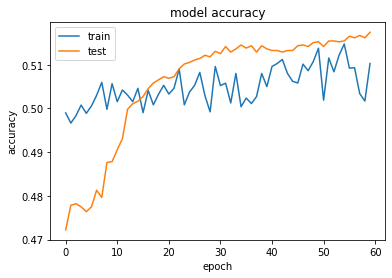

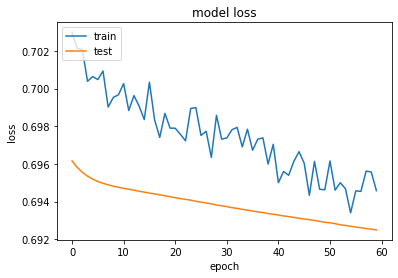

In [11]:
# Plot accuracy and loss values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
# Evaluate the model
model.evaluate_generator(validation_generator, steps = validation_generator.n // validation_generator.batch_size)

[0.6924901791783267, 0.51744187]

In [13]:
# Predictions

test_generator.reset()
predIdxs = model.predict_generator(test_generator,steps=(test_generator.n // test_generator.batch_size) + 1)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show classification report
print(classification_report(test_generator.classes, predIdxs, target_names=test_generator.class_indices.keys()))

              precision    recall  f1-score   support

 parasitized       0.55      0.21      0.30       688
  uninfected       0.51      0.83      0.63       688

    accuracy                           0.52      1376
   macro avg       0.53      0.52      0.47      1376
weighted avg       0.53      0.52      0.47      1376



In [14]:
cm = confusion_matrix(test_generator.classes, predIdxs)
total = sum(sum(cm))
acc = (cm[0,0] + cm[1,1]) / total
sensitivity = cm[0,0] / (cm[0,0] + cm[0,1])
specificity = cm[1,1] / (cm[1,0] + cm[1,1])

print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

acc: 0.5203
sensitivity: 0.2093
specificity: 0.8314
